# Part 1 of Data 822 Project: Exploratory Data Analysis

This set of commands lays out the process I used to explore the training dataset for the project. I start by importing our trusty friends pandas, numpy and matplotlib and set some default parameters for matplotlib.

In [5]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.pyplot.style.use('ggplot')
pd.set_option('max.rows', 100)
%matplotlib inline

## 30,000 foot view of the Training Set

I started by reading in the training set from the project submission repo and taking a look at it.

In [3]:
# Let's read in the training data set
df = pd.read_csv('~/rouest/project-submissions/data/train.csv')

In [6]:
# And take a basic look. Already we can see a number of object variables that may need to be converted.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509009 entries, 0 to 509008
Data columns (total 11 columns):
step              509009 non-null int64
type              509009 non-null object
amount            509009 non-null float64
nameOrig          509009 non-null object
oldbalanceOrg     509009 non-null float64
newbalanceOrig    509009 non-null float64
nameDest          509009 non-null object
oldbalanceDest    509009 non-null float64
newbalanceDest    509009 non-null float64
isFraud           509009 non-null int64
id                509009 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 42.7+ MB


And let's just confirm that we aren't going to need to impute any values or remove any incomplete records.

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
id                0
dtype: int64

## The Data Set: An Explainer

Below I've listed the descriptions of each part of our data set from the project repo listed by index on original read in. 

0. step: maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation)
1. type: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
2. amount: amount of the transaction in local currency
3. nameOrig: customer who started the transaction
4. oldbalanceOrg: initial balance before the transaction
5. newbalanceOrig: new balance after the transaction
6. nameDest: customer who is the recipient of the transaction
7. oldbalanceDest: initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants)
8. newbalanceDest: new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants)
9. isFraud: This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system
10. id: this is a unique ID number for the transaction record

Remember that isFraud at index 9 in our target variable!

Let's see what the data actually looks like:

In [9]:
# Looking at the data
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,id
0,303,CASH_IN,185164.71,C1499985475,3075480.01,3260644.72,C1771727877,881991.88,696827.18,0,540576
1,356,CASH_IN,79083.65,C108745493,5489716.32,5568799.97,C1167754301,153219.51,74135.86,0,120014
2,10,TRANSFER,2336832.78,C975415534,147958.78,0.00,C718985478,5069347.06,7307970.46,0,623141
3,238,TRANSFER,228517.91,C1968162743,0.00,0.00,C1544755390,18768561.09,18997079.00,0,547737
4,133,CASH_IN,180179.73,C467196066,21448.00,201627.73,C1386847873,7160295.13,6980115.40,0,569291
5,355,CASH_OUT,152809.83,C835813539,0.00,0.00,C1697188789,179097.81,331907.64,0,621439
6,379,CASH_OUT,119283.52,C1320649033,320946.00,201662.48,C1196142176,633606.80,752890.31,0,122016
7,178,PAYMENT,17037.96,C502419545,0.00,0.00,M1419983756,0.00,0.00,0,181905
8,283,PAYMENT,1658.36,C1804417059,0.00,0.00,M1729883225,0.00,0.00,0,604829
9,233,DEBIT,2539.38,C178740880,15230.00,12690.62,C34403520,779456.01,1108570.97,0,549197


In [12]:
# Since I don't see any fraudulent records in the firs head() call, let's make sure they are there!
df[df.isFraud == 1].head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,id
636,265,CASH_OUT,881187.51,C1389553281,881187.51,0.00,C372435481,35321.01,916508.52,1,163801
881,190,CASH_OUT,605029.34,C1568238028,605029.34,0.00,C506455454,211936.17,816965.52,1,88860
2340,160,TRANSFER,548161.93,C814345778,548161.93,0.00,C1464577173,0.00,0.00,1,507125
3605,425,CASH_OUT,486175.40,C1737680610,486175.40,0.00,C1596545373,0.00,486175.40,1,90109
6406,451,TRANSFER,9265.43,C1329487815,9265.43,0.00,C1936702457,0.00,0.00,1,463575
6419,186,TRANSFER,179321.12,C1132083905,179321.12,0.00,C955198432,0.00,0.00,1,53504
7871,514,TRANSFER,10880.26,C132837208,10880.26,0.00,C457634395,0.00,0.00,1,184398
9953,161,TRANSFER,10000000.00,C831325954,11336901.11,1336901.11,C1166671647,0.00,0.00,1,129097
9986,217,TRANSFER,972713.05,C706587857,972713.05,0.00,C1000855680,0.00,0.00,1,179789
12400,724,CASH_OUT,72389.42,C2090432901,72389.42,0.00,C2044300505,397599.55,469988.97,1,113267


In [16]:
# Let's also take a look at isFraud = 1 as a percentage of our overall data set
df[df.isFraud == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 636 to 507597
Data columns (total 11 columns):
step              669 non-null int64
type              669 non-null object
amount            669 non-null float64
nameOrig          669 non-null object
oldbalanceOrg     669 non-null float64
newbalanceOrig    669 non-null float64
nameDest          669 non-null object
oldbalanceDest    669 non-null float64
newbalanceDest    669 non-null float64
isFraud           669 non-null int64
id                669 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 62.7+ KB


In [32]:
print('The percentage of our dataset that has isFraud = 1 is %s percent.' % (df[df.isFraud == 1].shape[0]/df.shape[0]*100))

The percentage of our dataset that has isFraud = 1 is 0.13143186073330726 percent.


## Working through the disctinction between isFraud and NOT isFraud

In the following section, I am going to try to work methodically through each of our features to see any obvious deliniations for our taget variable. Let's start with step:

In [14]:
# So we don't have to include the logic on each call of df, let's make an isFraud = 1 df called dfraud
dfraud = df.loc[df.isFraud == 1]

## Looking at the whole set  vs. the isFraud set by step

Below I wanted to compare the a normed histogram for df and dfraud to see any comparative differences. I used normed = True in order to overlay them and actually be able to see the isFraud set.

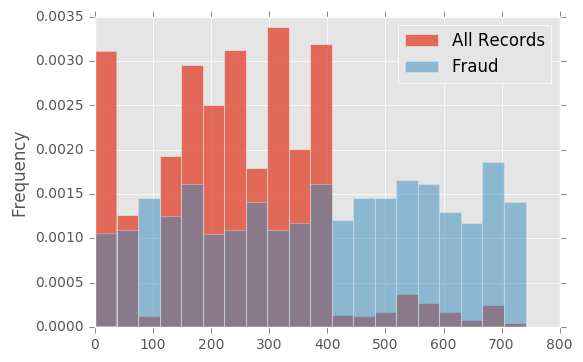

In [39]:
steps = df.step.plot.hist(label = 'All Records', alpha = 0.8, 
                            range = (df.step.min(), df.step.max()), bins = 20, normed = True)
ifsteps = dfraud.step.plot.hist(label = 'Fraud', alpha = 0.5, bins = 20, normed = True) 

steps.legend();
ifsteps.legend();

Looking at the records with step > 400, it almost appears as those isFraud follows the same distribution; let's take a closer look.

In [41]:
# We'll start with a non-fraud dataframe
dfnot = df.loc[df.isFraud == 0]

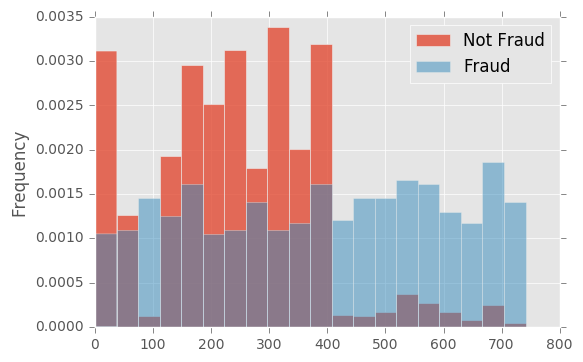

In [43]:
# And then run the same plot but with the range set for dfraud.step.max()
steps2 = dfnot.step.plot.hist(label = 'Not Fraud', alpha = 0.8, 
                            range = (dfnot.step.min(), dfraud.step.max()), bins = 20, normed = True)
ifsteps2 = dfraud.step.plot.hist(label = 'Fraud', alpha = 0.5, bins = 20, normed = True) 

steps2.legend();
ifsteps2.legend();

Dang, I half expected all records with steps > 400 to be accounted for by isFraud records. Of course it wasn't going to be that easy. Onward and upward!

## Let's get into our types!

Below we are going to explore the distribution of our transaction types. 

In [45]:
# Starting with the whole set
df['type'].value_counts()

CASH_OUT    178951
PAYMENT     172717
CASH_IN     111816
TRANSFER     42211
DEBIT         3314
Name: type, dtype: int64

In [47]:
# and then isFraud
dfraud['type'].value_counts()

CASH_OUT    339
TRANSFER    330
Name: type, dtype: int64

Interesting! This tells us with some confidence that isFraud = 1 will likely be isolated to those transaction types.

## Into the floats we go, starting with amount!

Below we are going to start working through our floats including, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest and newbalanceDest. We aren't including ID as that is not going to be in our feature space. 

In [72]:
df.describe(include= None).amount

count    5.090090e+05
mean     1.781422e+05
std      6.030880e+05
min      0.000000e+00
25%      1.336686e+04
50%      7.452952e+04
75%      2.084647e+05
max      9.244552e+07
Name: amount, dtype: float64

In [75]:
dfraud.describe(include= None).amount

count    6.690000e+02
mean     1.434819e+06
std      2.352313e+06
min      0.000000e+00
25%      1.191438e+05
50%      4.475892e+05
75%      1.388952e+06
max      1.000000e+07
Name: amount, dtype: float64

We can see a significant difference in mean between df a dfraud amounts but let's try to visualize them.

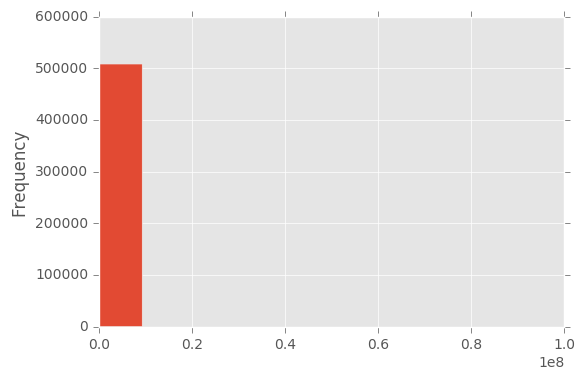

In [83]:
df.amount.plot.hist();

Well that's not helpful. Looks like the amounts are so skewed we'll need to transform to visualize. Let's see if we can kill two birds with one stone using numpy's log1p.

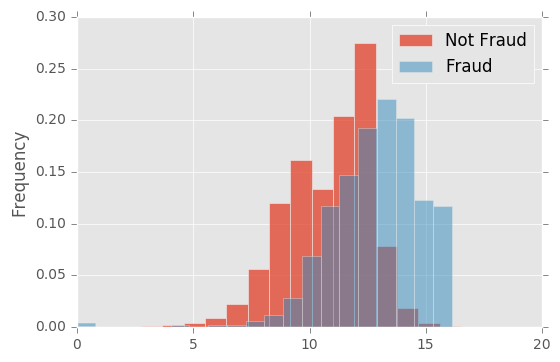

In [87]:
amount = np.log1p(df.amount).plot.hist(label = 'Not Fraud', alpha = 0.8, 
                            bins = 20, normed = True)
famount = np.log1p(dfraud.amount).plot.hist(label = 'Fraud', alpha = 0.5, bins = 20, normed = True) 

amount.legend();
famount.legend();

Not only are we successsul in actually seeing the full scope of out data, we now know that log1p transformation gets us much closer to a normal distribution. Let's try the same thing with our other floats.

In [89]:
df.describe(include= None).oldbalanceOrg

count    5.090090e+05
mean     8.310125e+05
std      2.879680e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.425700e+04
75%      1.075330e+05
max      5.039905e+07
Name: oldbalanceOrg, dtype: float64

In [90]:
dfraud.describe(include= None).oldbalanceOrg

count    6.690000e+02
mean     1.598529e+06
std      3.478363e+06
min      0.000000e+00
25%      1.191438e+05
50%      4.475892e+05
75%      1.388952e+06
max      5.039905e+07
Name: oldbalanceOrg, dtype: float64

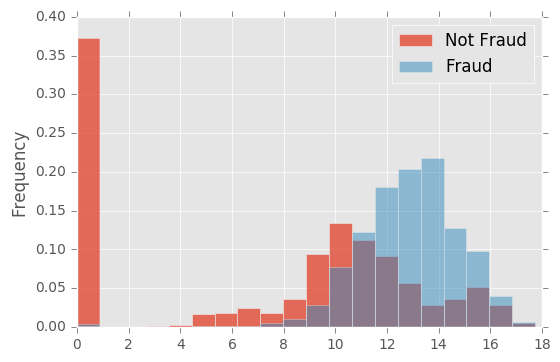

In [91]:
oldbalanceOrg = np.log1p(df.oldbalanceOrg).plot.hist(label = 'Not Fraud', alpha = 0.8, 
                            bins = 20, normed = True)
foldbalanceOrg = np.log1p(dfraud.oldbalanceOrg).plot.hist(label = 'Fraud', alpha = 0.5, bins = 20, normed = True) 

oldbalanceOrg.legend();
foldbalanceOrg.legend();

Looks like very few of our isFraud cases have a beginning balance from the source account of 0 when compared to all records. 

In [92]:
df.describe(include= None).newbalanceOrig

count    5.090090e+05
mean     8.523704e+05
std      2.915303e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.448556e+05
max      4.367380e+07
Name: newbalanceOrig, dtype: float64

In [93]:
dfraud.describe(include= None).newbalanceOrig

count    6.690000e+02
mean     1.637103e+05
std      1.938302e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.039905e+07
Name: newbalanceOrig, dtype: float64

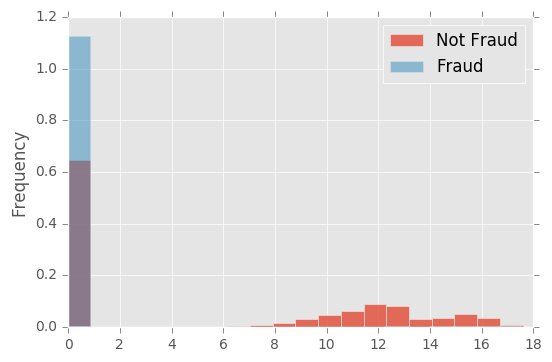

In [94]:
newbalanceOrig = np.log1p(df.newbalanceOrig).plot.hist(label = 'Not Fraud', alpha = 0.8, 
                            bins = 20, normed = True)
fnewbalanceOrig = np.log1p(dfraud.newbalanceOrig).plot.hist(label = 'Fraud', alpha = 0.5, bins = 20, normed = True) 

newbalanceOrig.legend();
fnewbalanceOrig.legend();

Wow! For the isFraud cases, it looks like the updated balance from the original account is (nearly) always 0!

In [95]:
df.describe(include= None).oldbalanceDest

count    5.090090e+05
mean     1.097301e+06
std      3.392718e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.294440e+05
75%      9.375382e+05
max      2.511150e+08
Name: oldbalanceDest, dtype: float64

In [96]:
dfraud.describe(include= None).oldbalanceDest

count    6.690000e+02
mean     6.201907e+05
std      2.015292e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.883258e+05
max      2.429635e+07
Name: oldbalanceDest, dtype: float64

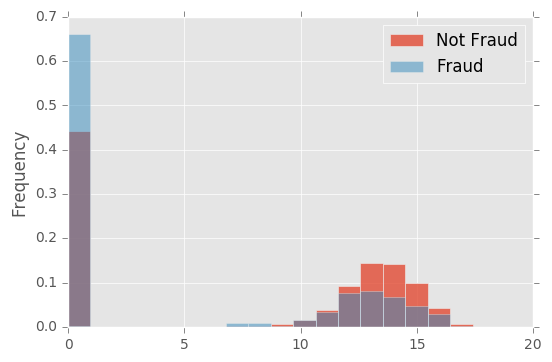

In [100]:
oldbalanceDest = np.log1p(df.oldbalanceDest).plot.hist(label = 'Not Fraud', alpha = 0.8, 
                            range = (np.log1p(df.oldbalanceDest).min(), np.log1p(df.oldbalanceDest).max()),
                            bins = 20, normed = True)
foldbalanceDest = np.log1p(dfraud.oldbalanceDest).plot.hist(label = 'Fraud', alpha = 0.5, 
                            range = (np.log1p(df.oldbalanceDest).min(), np.log1p(df.oldbalanceDest).max()),
                            bins = 20, normed = True) 

oldbalanceDest.legend();
foldbalanceDest.legend();

In [102]:
df.describe(include= None).newbalanceDest

count    5.090090e+05
mean     1.219353e+06
std      3.651259e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.121075e+05
75%      1.106533e+06
max      2.506381e+08
Name: newbalanceDest, dtype: float64

In [103]:
dfraud.describe(include= None).newbalanceDest

count    6.690000e+02
mean     1.403334e+06
std      2.918224e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.087290e+04
75%      1.183814e+06
max      2.529446e+07
Name: newbalanceDest, dtype: float64

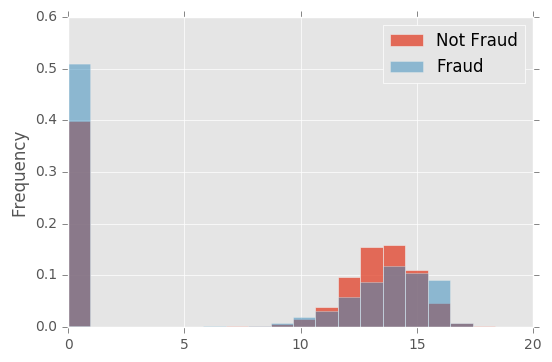

In [101]:
newbalanceDest = np.log1p(df.newbalanceDest).plot.hist(label = 'Not Fraud', alpha = 0.8, 
                            range = (np.log1p(df.newbalanceDest).min(), np.log1p(df.newbalanceDest).max()),
                            bins = 20, normed = True)
fnewbalanceDest = np.log1p(dfraud.newbalanceDest).plot.hist(label = 'Fraud', alpha = 0.5, 
                            range = (np.log1p(df.newbalanceDest).min(), np.log1p(df.newbalanceDest).max()),
                            bins = 20, normed = True) 

newbalanceDest.legend();
fnewbalanceDest.legend();

## What do we have left to analyze? Or, I am sick of scrolling.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509009 entries, 0 to 509008
Data columns (total 11 columns):
step              509009 non-null int64
type              509009 non-null object
amount            509009 non-null float64
nameOrig          509009 non-null object
oldbalanceOrg     509009 non-null float64
newbalanceOrig    509009 non-null float64
nameDest          509009 non-null object
oldbalanceDest    509009 non-null float64
newbalanceDest    509009 non-null float64
isFraud           509009 non-null int64
id                509009 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 42.7+ MB


So far, we've worked through step, type, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest and newbalanceDest. All that's left are nameOrig and nameDest. Given that these are basically unique account numbers, there may not be much to glean. But wait! We can distinguish what type of account (merchant or consumer) by the leading character.

In [106]:
# Let's create a lambda function and a new variable to analyze the account types
df['nameOrigCat'] = df.nameOrig.apply(lambda x: x[0])

In [108]:
df.nameOrigCat.value_counts()

C    509009
Name: nameOrigCat, dtype: int64

Hmm, looks like all transactions started from consumer accounts regardless of isFraud status. Let's try namedest:

In [109]:
df['nameDestCat'] = df.nameDest.apply(lambda x: x[0])

In [111]:
df.nameDestCat.value_counts()

C    336292
M    172717
Name: nameDestCat, dtype: int64

Huzzah! Looks like there's some distinction there. 

In [114]:
pd.crosstab(df.isFraud, df.nameDestCat) # plot the crosstab for survival by sex

nameDestCat,C,M
isFraud,,
0,335623,172717
1,669,0


Well, not as informative as I'd hoped, but at least it's good to know that no fraudulent transactions went to merchants!